In [127]:
!pwd

/Users/diegooliveirafaria/Projects/alice_exploration


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
alice_data = pd.read_csv("EXP_COMPLETA.csv",sep=';')
country_codes = pd.read_csv("PAIS.csv",sep=';',encoding="latin-1")

In [7]:
dir(alice_data)

['T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__re

In [80]:
alice_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25243652 entries, 0 to 25243651
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CO_ANO         object 
 1   CO_MES         object 
 2   CO_NCM         object 
 3   CO_UNID        object 
 4   CO_PAIS        object 
 5   SG_UF_NCM      object 
 6   CO_VIA         object 
 7   CO_URF         object 
 8   QT_ESTAT       int64  
 9   KG_LIQUIDO     float64
 10  VL_FOB         float64
 11  CO_PAIS_ISOA3  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.4+ GB


In [ ]:
country_codes.info()

In [37]:
alice_data = alice_data.astype({"CO_ANO":str,'CO_MES':str,
                                          'CO_NCM':str,'CO_UNID':str,'CO_PAIS':str,
                                          'SG_UF_NCM':str,'CO_VIA':str,'CO_URF':str,'KG_LIQUIDO':float,'VL_FOB':float})             
                                

In [51]:
country_codes = country_codes.astype({"CO_PAIS":str})

In [57]:
alice_data = pd.merge(alice_data,country_codes[['CO_PAIS','CO_PAIS_ISOA3']],how="left",on="CO_PAIS")

In [58]:
alice_data.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,CO_PAIS_ISOA3
0,1997,11,74122000,10,249,SP,4,817600,0,0.0,3.0,USA
1,1997,11,73082000,10,97,MG,7,130151,0,4292.0,6442.0,BOL
2,1997,11,84248119,11,196,SP,1,817800,32,3468.0,31510.0,CRI
3,1997,11,48239090,10,586,MN,9,910600,0,0.0,1.0,PRY
4,1997,11,72112910,10,850,SP,1,817800,118,117505.0,103866.0,VEN


In [41]:
alice_data[["CO_PAIS"]].describe()

,CO_PAIS
count,25243652
unique,265
top,63
freq,2252358


In [42]:
alice_data[["CO_VIA"]].describe()

,CO_VIA
count,25243652
unique,14
top,1
freq,10664595


In [123]:
alice_data_2021 = alice_data.query("(CO_PAIS_ISOA3=='ARG' or CO_PAIS_ISOA3=='USA' or CO_PAIS_ISOA3=='CHN') and CO_ANO=='2021' and VL_FOB < 100000")

In [124]:
alice_data_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171422 entries, 22902532 to 24382812
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CO_ANO         171422 non-null  object 
 1   CO_MES         171422 non-null  object 
 2   CO_NCM         171422 non-null  object 
 3   CO_UNID        171422 non-null  object 
 4   CO_PAIS        171422 non-null  object 
 5   SG_UF_NCM      171422 non-null  object 
 6   CO_VIA         171422 non-null  object 
 7   CO_URF         171422 non-null  object 
 8   QT_ESTAT       171422 non-null  int64  
 9   KG_LIQUIDO     171422 non-null  float64
 10  VL_FOB         171422 non-null  float64
 11  CO_PAIS_ISOA3  171422 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 17.0+ MB


<AxesSubplot:xlabel='CO_PAIS_ISOA3', ylabel='VL_FOB'>

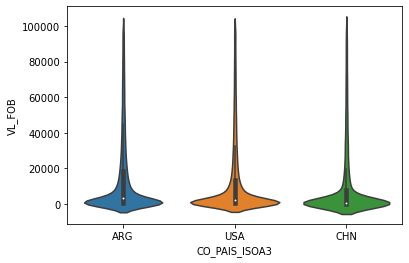

In [125]:
sns.violinplot(x='CO_PAIS_ISOA3',y ='VL_FOB', data = alice_data_2021)